I. Lab Activity </br>
a) Get five books from Gutenberg corpus. </br>
b) Use the following taggers on these books: a) default tagger; b) regular expression tagger (add more
rules if you like); c) lookup tagger; d) unigram tagger; and e) mixed tagger (combination of different
taggers using backoff). </br>
NOTE: Use the same tagged corpus: Brow Corpus for evaluation. </br>
c) Create graph/s comparing the accuracy of different taggers at tagging the books. </br>

# Code Walkthrough

## Task A.

In [ ]:
import nltk
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
emma_romance = nltk.corpus.gutenberg.words('austen-emma.txt')
alice_fiction = nltk.corpus.gutenberg.words('carroll-alice.txt')
paradise_biblical = nltk.corpus.gutenberg.words('milton-paradise.txt')
hamlet_drama = nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')
leaves_poetry = nltk.corpus.gutenberg.words('whitman-leaves.txt')
books = [emma_romance,alice_fiction,paradise_biblical,hamlet_drama,leaves_poetry]

## Task B.

**Making a baseline of 5 books based on unigram tagger.**

In [ ]:
from nltk.corpus import brown
def tag_baseline(book):
  brown_tagged_sents = brown.tagged_sents(categories='news')
  brown_sents = brown.sents(categories='news')
  unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
  book = unigram_tagger.tag(book)
  unigram_tagger.accuracy([book])
  return unigram_tagger


baseline_emma = tag_baseline(emma_romance)
baseline_alice = tag_baseline(alice_fiction)
baseline_paradise = tag_baseline(paradise_biblical)
baseline_hamlet = tag_baseline(hamlet_drama)
baseline_leaves = tag_baseline(leaves_poetry)

def tagged_books(book):
  brown_tagged_sents = brown.tagged_sents(categories='news')
  brown_sents = brown.sents(categories='news')
  unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
  book = unigram_tagger.tag(book)
  return book

tagged_emma = tagged_books(emma_romance)
tagged_alice = tagged_books(alice_fiction)
tagged_paradise = tagged_books(paradise_biblical)
tagged_hamlet = tagged_books(hamlet_drama)
tagged_leaves = tagged_books(leaves_poetry)

**Default Tagger**

In [ ]:
def default_tagger(book):
  default_tagger = nltk.DefaultTagger('NN')
  tag = default_tagger.tag(book)
  return tag

DT_emma = baseline_emma.accuracy([default_tagger(emma_romance)])
DT_alice = baseline_alice.accuracy([default_tagger(alice_fiction)])
DT_paradise = baseline_paradise.accuracy([default_tagger(paradise_biblical)])
DT_hamlet = baseline_hamlet.accuracy([default_tagger(hamlet_drama)])
DT_leaves = baseline_leaves.accuracy([default_tagger(leaves_poetry)])

In [ ]:
print("Accuracy for the book Emma using Default tagger is     " + str(DT_emma))
print("Accuracy for the book Alice using Default tagger is    " + str(DT_alice))
print("Accuracy for the book Paradise using Default tagger is " + str(DT_paradise))
print("Accuracy for the book Hamlet using Default tagger is   " + str(DT_hamlet))
print("Accuracy for the book Leaves using Default tagger is   " + str(DT_leaves))

Accuracy for the book Emma using Default tagger is     0.07427751822769155
Accuracy for the book Alice using Default tagger is    0.06068601583113457
Accuracy for the book Paradise using Default tagger is 0.07795507358636716
Accuracy for the book Hamlet using Default tagger is   0.03800856531049251
Accuracy for the book Leaves using Default tagger is   0.08268822272295862


**Regular Expression Tagger**

In [ ]:
def regular_expression_tagger(book):
  patterns = [
  (r'.*ing$', 'VBG'),                # gerunds
  (r'.*ed$', 'VBD'),                 # simple past
  (r'.*es$', 'VBZ'),                 # 3rd singular present
  (r'.*ould$', 'MD'),                # modals
  (r'.*\'s$', 'NN$'),                # possessive nouns
  (r'.*s$', 'NNS'),                  # plural nouns
  (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
  (r'.*', 'NN')                      # nouns (default)
  ]
  regexp_tagger = nltk.RegexpTagger(patterns)
  regex_tag = regexp_tagger.tag(book)
  return regex_tag

RX_emma = baseline_emma.accuracy([regular_expression_tagger(emma_romance)])
RX_alice = baseline_alice.accuracy([regular_expression_tagger(alice_fiction)])
RX_paradise = baseline_paradise.accuracy([regular_expression_tagger(paradise_biblical)])
RX_hamlet = baseline_hamlet.accuracy([regular_expression_tagger(hamlet_drama)])
RX_leaves = baseline_leaves.accuracy([regular_expression_tagger(leaves_poetry)])

In [ ]:
print("Accuracy for the book Emma using Regular Expression tagger is     " + str(RX_emma))
print("Accuracy for the book Alice using Regular Expression tagger is    " + str(RX_alice))
print("Accuracy for the book Paradise using Regular Expression tagger is " + str(RX_paradise))
print("Accuracy for the book Hamlet using Regular Expression tagger is   " + str(RX_hamlet))
print("Accuracy for the book Leaves using Regular Expression tagger is   " + str(RX_leaves))

Accuracy for the book Emma using Regular Expression tagger is     0.10263632442432714
Accuracy for the book Alice using Regular Expression tagger is    0.09337437701553797
Accuracy for the book Paradise using Regular Expression tagger is 0.1040846888716757
Accuracy for the book Hamlet using Regular Expression tagger is   0.047724839400428265
Accuracy for the book Leaves using Regular Expression tagger is   0.11601660608330158


**POS Tag**

In [ ]:
def pos_tag(book):
  pos_t = nltk.pos_tag(book)
  return pos_t

PT_emma = baseline_emma.accuracy([pos_tag(emma_romance)])
PT_alice = baseline_alice.accuracy([pos_tag(alice_fiction)])
PT_paradise = baseline_paradise.accuracy([pos_tag(paradise_biblical)])
PT_hamlet = baseline_hamlet.accuracy([pos_tag(hamlet_drama)])
PT_leaves = baseline_leaves.accuracy([pos_tag(leaves_poetry)])

In [ ]:
print("Accuracy for the book Emma using POS tagger is     " + str(PT_emma))
print("Accuracy for the book Alice using POS tagger is    " + str(PT_alice))
print("Accuracy for the book Paradise using POS tagger is " + str(PT_paradise))
print("Accuracy for the book Hamlet using POS tagger is   " + str(PT_hamlet))
print("Accuracy for the book Leaves using POS tagger is   " + str(PT_leaves))

Accuracy for the book Emma using POS tagger is     0.4696378366861199
Accuracy for the book Alice using POS tagger is    0.43550278510700674
Accuracy for the book Paradise using POS tagger is 0.48775626129615285
Accuracy for the book Hamlet using POS tagger is   0.3884100642398287
Accuracy for the book Leaves using POS tagger is   0.4788130395201539


**Lookup Tagger**

In [ ]:
def lookup_tagger(book,tagged_book):
  fd = nltk.FreqDist(book)
  cfd = nltk.ConditionalFreqDist(tagged_book)
  most_freq_words = fd.most_common(100)
  likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
  baseline_tagger = nltk.UnigramTagger(model=likely_tags)
  baseline_tagger = baseline_tagger.tag(book)
  return baseline_tagger

LT_emma = baseline_emma.accuracy([lookup_tagger(emma_romance,tagged_emma)])
LT_alice = baseline_alice.accuracy([lookup_tagger(alice_fiction,tagged_alice)])
LT_paradise = baseline_paradise.accuracy([lookup_tagger(paradise_biblical,tagged_paradise)])
LT_hamlet = baseline_hamlet.accuracy([lookup_tagger(hamlet_drama,tagged_hamlet)])
LT_leaves = baseline_leaves.accuracy([lookup_tagger(leaves_poetry,tagged_leaves)])

In [ ]:
print("Accuracy for the book Emma using Lookup tagger is     " + str(LT_emma))
print("Accuracy for the book Alice using Lookup tagger is    " + str(LT_alice))
print("Accuracy for the book Paradise using Lookup tagger is " + str(LT_paradise))
print("Accuracy for the book Hamlet using Lookup tagger is   " + str(LT_hamlet))
print("Accuracy for the book Leaves using Lookup tagger is   " + str(LT_leaves))

Accuracy for the book Emma using Lookup tagger is     0.6963783668611994
Accuracy for the book Alice using Lookup tagger is    0.723570800351803
Accuracy for the book Paradise using Lookup tagger is 0.7098270074877356
Accuracy for the book Hamlet using Lookup tagger is   0.809154175588865
Accuracy for the book Leaves using Lookup tagger is   0.7172317168443276


## Task C.

**Default Tagger**

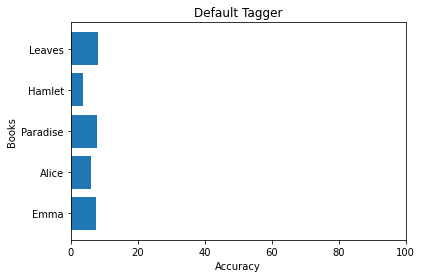

In [ ]:
#@title
import matplotlib.pyplot as plt
y=['Emma', 'Alice', 'Paradise', 'Hamlet', 'Leaves']

# getting values against each value of y
x=[DT_emma,DT_alice,DT_paradise,DT_hamlet,DT_leaves]
multiplied_list = [element * 100 for element in x]
plt.barh(y, multiplied_list)
 
# setting label of y-axis
plt.ylabel("Books")
plt.xlim(left=0, right=100)

# setting label of x-axis
plt.xlabel("Accuracy")
plt.title("Default Tagger")
plt.show()

**Paradise has the highest accuracy among all books, it seems that it is the book that has the highest word that has a type of noun mentioned. We can also see the ineffectiveness of default tagger in tagging the book.**

**Regular Expression Tagger**

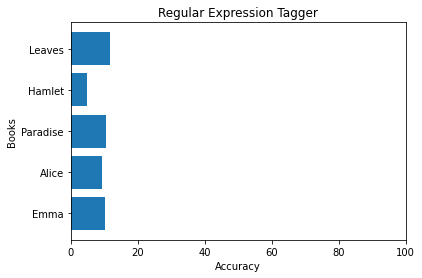

In [ ]:
#@title
y=['Emma', 'Alice', 'Paradise', 'Hamlet', 'Leaves']

# getting values against each value of y
x=[RX_emma,RX_alice,RX_paradise,RX_hamlet,RX_leaves]
multiplied_list = [element * 100 for element in x]
plt.barh(y, multiplied_list)
 
# setting label of y-axis
plt.ylabel("Books")
plt.xlim(left=0, right=100)

# setting label of x-axis
plt.xlabel("Accuracy")
plt.title("Regular Expression Tagger")
plt.show()

**Leaves has the highest accuracy among all books using the regular expression tagger. It seems like the pattern in the RegEx tagger is more suitable on poetry type of books. However, the accuracy is still very low and there is not much improvement compared to the default tagger.**

**POS Tagger**

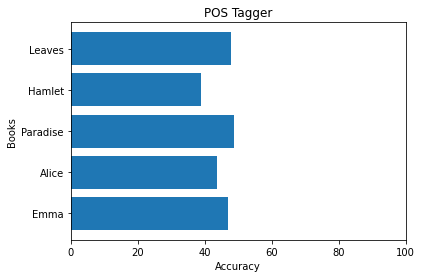

In [ ]:
#@title
y=['Emma', 'Alice', 'Paradise', 'Hamlet', 'Leaves']

# getting values against each value of y
x=[PT_emma,PT_alice,PT_paradise,PT_hamlet,PT_leaves]
multiplied_list = [element * 100 for element in x]
plt.barh(y, multiplied_list)
 
# setting label of y-axis
plt.ylabel("Books")
plt.xlim(left=0, right=100)

# setting label of x-axis
plt.xlabel("Accuracy")
plt.title("POS Tagger")
plt.show()

**Emma, Paradise, and Leaves has the best accuracy using the POS tagger while Hamlet is at the last place since it has a different structure of storytelling since the story comes in first person. Part of Speech tagger's accuracy also made a huge gain compared to default and regular expression taggers but it is still not the best since it only has an average of 50%. Luckily, we still have the Lookup Tagger to compared on which the results will be seen at the next figure.**

**Lookup Tagger**

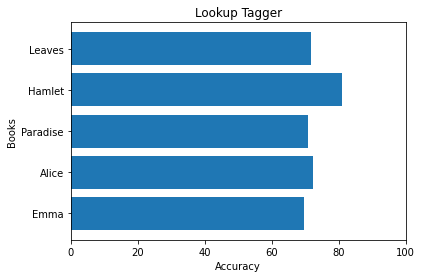

In [ ]:
#@title
y=['Emma', 'Alice', 'Paradise', 'Hamlet', 'Leaves']

# getting values against each value of y
x=[LT_emma,LT_alice,LT_paradise,LT_hamlet,LT_leaves]
multiplied_list = [element * 100 for element in x]
plt.barh(y, multiplied_list)
 
# setting label of y-axis
plt.ylabel("Books")
plt.xlim(left=0, right=100)

# setting label of x-axis
plt.xlabel("Accuracy")
plt.title("Lookup Tagger")
plt.show()

**The result of the lookup tagger is opposite compared to the POS tagger since Hamlet have the best accuracy using lookup tagger. It seems that Hamlet has many similar tags with the frequent words compared to other books. Overall, lookup tagger has an average of 73% on all the books. This concludes that lookup tagger is the best tagger among all tagger based on this study. But i still think that the lookup tagger is quite inefficient since it requires the tagged version of the book to be tagged on in order to do the tagging. What's the point of tagging a book if there is already a tagged version of it.**